In [167]:
# -*- coding: utf-8 -*-
import re
import sys
import bs4
from bs4 import BeautifulSoup as soup
import urllib
from urllib import urlopen as uReq
import codecs
import unicodedata

# To create a file named 'walmart_toys.csv' and add 'product,price_was,price_save,price,star,review,promo_flag' we run this 
#code written below.Be advised that once you use with open, you do not need to close the csv file

with open ('walmart_toys.csv', 'w') as f:

    f.write('product,price_was,price_save,price,star,review,promo_flag\n')

# We are going to scrape 26 pages, that is the reason why we created a for loop with the format command.

for page in range(1,26):
    
    url = "https://www.walmart.com/search/?page={}&po=1&query=toys+for+girls+3-6+years&typeahead=toys#searchProductResult".format(page)

# By using the urlopen, we open the url and with BeautifulSoup we parse the page.

    html = uReq(url)
    
    page_soup= soup(html, 'html.parser')
    
# Containers are the main blocks we are going to scrape, be carefull about the class/tag or link names 

    containers=page_soup.findAll('ul', {'class':'classifiedInfoList'}) 
    
# Container is the first block on the page

# In order to visit all containers we created a for loop on the page

    container=containers[0]
    
    for container in containers:
        
# We try to find out the data to be scraped from the container, using inspect menu. This block returns the name of the toys

        brand_container = container.findAll('div', {'class':'search-result-product-title gridview'})

# This part is the cleaning of the data we are trying to reach out. Each item has its own feature that is the reason why we
# need to come up with different solutions.

        product = ' '.join([x for x in brand_container[0].text.strip().split("Title")[1:]])

        try:
          
            product = product.split(',')[0]
        
        except:
            
            pass

# Using encode('utf-8) pulls unicode out from data             

        product = product.encode('utf-8')
        
        print ('Product', product, type(product))
        
# This block returns the previous price of the toys
        try:
            
            price_was_container = container.findAll('span', {'class':'Price-group'})
        
            price_was = price_was_container[0].text.split()
                   
            price_was = price_was[0].replace('$','')
            
            price_was = price_was.replace(',','')
            
            price_was = price_was.encode('utf-8') 
            
            print ('Price_was', price_was, type(price_was))
            
        except Exception as e:
        
            print(e)

# This block returns howmuch money the buyer saves. The reason why we add the exception as pass that's because some toys
# do not have saved price.

        try:
            
            price_save_container = container.findAll('div', {'class':'price-saving-block'})
            
            price_save = price_save_container[0].text.strip()
            
            price_save = price_save.split('$')[1]
            
            price_save = price_save.encode('utf-8')           
            
            print ('Price_save', price_save, type(price_save))
        
        except :
        
            pass

# This block returns the current price of the toys

        try:
            
            price_container = container.findAll('div', {'class':'price-main-block'})
            
            price = price_container[0].text.strip()
            
            price = price.split('$')[1]
            
            price = price.replace(',','')
            
            price = price.encode('utf-8')
            
            print ('Price', price, type(price))
        
        except:
        
            pass

# This block returns how many stars each toy has based on the reviews. We used Regular Expression to clean the data and 
# concatenate decimal value of the review 

        try:
            
            star_container = container.find_all('span', {'class':'stars-container'})
                   
            star = star_container[0]['alt']
            
            star = re.findall(r'\d{1,5}', star)
                
            if len(star) == 4:
                
                star1 ='.'.join([x for x in star[0:2]])
                
                star1 = star1.encode('utf-8')
                                
            elif len(star) == 3:
                
                star1 =star[0]
                
                star1 = star1.encode('utf-8')
            
            print ('Star', star1, type(star1))
        
        except:
            
            pass
        
# This block returns how many reviews each toy has
        
        try:    
            
            review = [x for x in star]
            
            review = review[-1]
            
            review = review.encode('utf-8')
        
            print ('Review', review, type(review))
            
        except:
            
            pass

# This block returns if there is any sale or promosion on the product        
        try:
        
            flag_container = container.find_all('div', {'class':'prod-FlagList-container'})
    
            promo_flag = flag_container[0].text.strip()
        
            promo_flag = promo_flag.encode('utf-8')
            
            print ('Promotion', promo_flag, type(promo_flag))
        
        except:
            
            pass

# To write the data to the csv file, we used append as a

        with open ('walmart_toys.csv', 'a') as f:

            f.write (product +','+ price_was + ',' + price_save + ',' + price + ',' + star1 + ',' + review + ',' + promo_flag +'\n')    

('Product', "Pressman Toy Let's Go Fishin' Game", <type 'str'>)
('Price_was', '12.97', <type 'str'>)
('Price_save', '6.48', <type 'str'>)
('Price', '6.49', <type 'str'>)
('Star', '4.3869', <type 'str'>)
('Review', '168', <type 'str'>)
('Promotion', 'Best Seller', <type 'str'>)
('Product', 'Care for Me Learning Carrier\xe2\x84\xa2', <type 'str'>)
('Price_was', '22.59', <type 'str'>)
('Price', '22.59', <type 'str'>)
('Star', '4.6667', <type 'str'>)
('Review', '45', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Best Choice Products Toy Vanity Set  w/16 Beauty Accessories', <type 'str'>)
('Price_was', '79.99', <type 'str'>)
('Price_save', '45.05', <type 'str'>)
('Price', '34.94', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '5', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere  ...', <type 'str'>)
('Price_was', '46.99', <type 'str'>)
('Price', '46.99', <type 'str'>)
('Star', '3.16

('Product', 'Manhattan Toy Groovy Girls', <type 'str'>)
('Price_was', '24.99', <type 'str'>)
('Price_save', '11.29', <type 'str'>)
('Price', '13.70', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Flying Butterfly Toys Classic Wind Up Swallow Tail Butterfly - Clo  ...', <type 'str'>)
('Price_was', '10.49', <type 'str'>)
('Price_save', '3.50', <type 'str'>)
('Price', '6.99', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Police Officer Girl Child Costume', <type 'str'>)
('Price_was', '11.59', <type 'str'>)
('Price', '11.59 - ', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Role Play Costume Set - Chef', <type 'str'>)
('Price_was', '23.67', <type 'str'>)
('Price', '23.67', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '18', <type 'str'>)
('Promotio

('Price', '39.97', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Raindrops Unisex Baby Delightful Brights 4-Piece Kite Footie Gift   ...', <type 'str'>)
('Price_was', '41.99', <type 'str'>)
('Price', '41.99', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Ride On Toy Go Kart', <type 'str'>)
('Price_was', '121.85', <type 'str'>)
('Price', '121.85', <type 'str'>)
('Star', '2.2', <type 'str'>)
('Review', '5', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Today\'s Girl Dolls by CP Toys - 18" Leah Doll', <type 'str'>)
('Price_was', '39.99', <type 'str'>)
('Price', '39.99', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Baby Flounder Fish Costume', <type 'str'>)
('Price_was', '49.99', <type 'str'>)
('Price', '49.99', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Gigatent Show Case 36"

('Product', 'Toysery Pretend Play Cosmetic and Makeup Toy Set Kit for Little Gi  ...', <type 'str'>)
('Price_was', '13.99', <type 'str'>)
('Price', '13.99', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Ride on Toy', <type 'str'>)
('Price_was', '122.48', <type 'str'>)
('Price', '122.48', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', '3 Wheel Motorcycle', <type 'str'>)
('Price_was', '76.48', <type 'str'>)
('Price', '76.48 - ', <type 'str'>)
('Star', '2.2101', <type 'str'>)
('Review', '119', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Pink Paislee Single-Sided Paper Pad 6"X6" 36/Pkg-Wild Child - Girl', <type 'str'>)
('Price_was', '8.99', <type 'str'>)
('Price', '8.99', <type 'str'>)
('Review', '119', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'LAMINATED POSTER Children Doll Sad Girl Hand Toys Injury Tears Pos  ...', <ty

('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Set Of 12 Assorted 36" Inflatable Girl Aliens Martian Prop Toy Dec  ...', <type 'str'>)
('Price_was', '19.99', <type 'str'>)
('Price', '19.99', <type 'str'>)
('Review', '4', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Cute Girl Hairdresser 17-7 Pretend Play Toy Fashion Beauty Play Se  ...', <type 'str'>)
('Price_was', '19.80', <type 'str'>)
('Price', '19.80', <type 'str'>)
('Star', '1', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Princess Tiara Dress-up Costume Shoes Toys 2 Shoe Sets For Girls P  ...', <type 'str'>)
('Price_was', '21.97', <type 'str'>)
('Price', '21.97', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Best Choice Products Kids Ride On ATV Quad 4 Wheeler 12V Battery E  ...', <type 'str'>)
('Price_was', '249.95', <type 'str'>)
('Price_save', '134.96', <type 'str'>)
('Price', '114.99', <type 'str'>)
('Star', '4.0263

('Product', '36" Hot Pink Inflatable Girl Alien Martian Prop Toy Decoration', <type 'str'>)
('Price_was', '2.99', <type 'str'>)
('Price', '2.99', <type 'str'>)
('Review', '94', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Sport Style 12V Kids Ride-On Toy Car MP3', <type 'str'>)
('Price_was', '299.99', <type 'str'>)
('Price', '299.99', <type 'str'>)
('Review', '94', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'ALEX Toys Do-it-Yourself Wear Paint and Sparkle Galaxy Jewelry', <type 'str'>)
('Price_was', '12.00', <type 'str'>)
('Price_save', '4.00', <type 'str'>)
('Price', '8.00', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'LAMINATED POSTER Children Cry Tears Girl Sweet Toys Doll Injured P  ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'JC Toys Berenguer 15" La Newborn "Real

('Price', '32.84 - ', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Girl sewing clothes with a toy sewing machine Poster Print', <type 'str'>)
('Price_was', '32.83', <type 'str'>)
('Price', '32.83', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Manhattan Toy Groovy Girls', <type 'str'>)
('Price_was', '15.39', <type 'str'>)
('Price', '15.39', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', '6V Dodge Viper Ride-On', <type 'str'>)
('Price_was', '99.00', <type 'str'>)
('Price', '99.00 - ', <type 'str'>)
('Star', '4.1857', <type 'str'>)
('Review', '70', <type 'str'>)
('Promotion', 'Rollback', <type 'str'>)
('Product', '6V Dodge Viper Ride-On', <type 'str'>)
('Price_was', '99.00', <type 'str'>)
('Price', '99.00 - ', <type 'str'>)
('Star', '4.1857', <type 'str'>)
('Review', '70', <type 'str'>)
('Promotion', 'Rollback', <type 'str'>)
('Product', 'Laminated Poster Soft T

('Price', '29.20', <type 'str'>)
('Review', '38', <type 'str'>)
('Promotion', 'New', <type 'str'>)
('Product', 'Pretend Play Shopping Cart- Toy Grocery Cart With Pivoting Front W  ...', <type 'str'>)
('Price_was', '29.20', <type 'str'>)
('Price', '29.20', <type 'str'>)
('Review', '38', <type 'str'>)
('Promotion', 'New', <type 'str'>)
('Product', 'Best Choice Products Kids 12V Ride On Sports Car Style W/ Hydrauli  ...', <type 'str'>)
('Price_was', '399.99', <type 'str'>)
('Price_save', '220.00', <type 'str'>)
('Price', '179.99', <type 'str'>)
('Star', '3', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Disney Minnie Mouse Oversized Soft Collapsible Storage Toy Trunk', <type 'str'>)
('Price_was', '17.06', <type 'str'>)
('Price', '17.06', <type 'str'>)
('Star', '4.488', <type 'str'>)
('Review', '836', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'LAMINATED POSTER Toys Girl Play Face Doll Children Toys Eyes Poste  ...', <t

('Review', '39', <type 'str'>)
('Promotion', 'Clearance', <type 'str'>)
('Product', 'ALEX Toys Craft Color and Cuddle Pony Soft Toy', <type 'str'>)
('Price_was', '12.50', <type 'str'>)
('Price_save', '4.92', <type 'str'>)
('Price', '7.58', <type 'str'>)
('Star', '3.5', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Kids Ride On 6V Battery Powered ATV Quad', <type 'str'>)
('Price_was', '39.87', <type 'str'>)
('Price', '39.87', <type 'str'>)
('Star', '3.6809', <type 'str'>)
('Review', '47', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Crayola Fashion Superstar: Virtual Designer Kit for Kids', <type 'str'>)
('Price_was', '19.97', <type 'str'>)
('Price', '19.97', <type 'str'>)
('Star', '4.7576', <type 'str'>)
('Review', '33', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Costway Red Audi Kids 12V Electric Ride On Car With MP3 RC Remote   ...', <type 'str'>)
('Price_was', '299.99', <type 'str'>)
('Price_save', '100.00', <t

('Product', 'Shimmer and Shine Genie Dance 2-Pack', <type 'str'>)
('Price_was', '59.88', <type 'str'>)
('Price_save', '17.48', <type 'str'>)
('Price', '42.40', <type 'str'>)
('Star', '4.3333', <type 'str'>)
('Review', '6', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Ride on Toy', <type 'str'>)
('Price_was', '87.54', <type 'str'>)
('Price', '87.54 - ', <type 'str'>)
('Review', '6', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Child Girl Toy Story Buzz Lightyear Tutu Prestige Costume by Disgu  ...', <type 'str'>)
('Price_was', '66.05', <type 'str'>)
('Price', '66.05', <type 'str'>)
('Review', '6', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Kids Play Toy Girl Baby Toy Kitchen Cooking Simulation Table Utens  ...', <type 'str'>)
('Price_was', '112.85', <type 'str'>)
('Price_save', '54.17', <type 'str'>)
('Price', '58.68', <type 'str'>)
('Star', '1', <type 'str'>)
('Review', '3', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product

('Product', 'KidKraft Uptown Pastel Kitchen', <type 'str'>)
('Price_was', '139.99', <type 'str'>)
('Price', '139.99', <type 'str'>)
('Star', '4.7647', <type 'str'>)
('Review', '68', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Balsa Wood Strip 36"-3/16"X3/16"', <type 'str'>)
('Price_was', '23.13', <type 'str'>)
('Price_save', '6.01', <type 'str'>)
('Price', '17.12', <type 'str'>)
('Review', '68', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Clearance ! 49 PCS Kitchen Cooking Set Girls Boys Fruit Vegetable   ...', <type 'str'>)
('Price_was', '89.97', <type 'str'>)
('Price_save', '59.98', <type 'str'>)
('Price', '29.99', <type 'str'>)
('Review', '68', <type 'str'>)
('Promotion', 'Clearance', <type 'str'>)
('Product', 'Rechargeable 6V/7A Plush Animal Ride On Toy for Kids (3 ~ 7 Years   ...', <type 'str'>)
('Price_was', '179.93', <type 'str'>)
('Price', '179.93', <type 'str'>)
('Review', '68', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product'

('Product', 'Rechargeable 6V/7A Plush Animal Ride On Toy for Kids (3 ~ 7 Years   ...', <type 'str'>)
('Price_was', '219.93', <type 'str'>)
('Price', '219.93', <type 'str'>)
('Review', '11', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'LAMINATED POSTER Pretty Doll Charming Beauty Children Toys Barbie   ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '11', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'LAMINATED POSTER Pretty Charming Children Toys Doll Beauty Barbie   ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '11', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Laminated Poster Children Toys Pretty Beauty Doll Charming Barbie   ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '11', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Pokemon XY12 Evolutions Booster Box 36-Count', <t

('Star', '5', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', '2018 Porsche Boxster Style 12V Ride On Car Battery Powered Wheels   ...', <type 'str'>)
('Price_was', '599.99', <type 'str'>)
('Price_save', '300.00', <type 'str'>)
('Price', '299.99', <type 'str'>)
('Star', '4.7778', <type 'str'>)
('Review', '9', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'My Life As 18" Cheerleader Doll', <type 'str'>)
('Price_was', '27.97', <type 'str'>)
('Price', '27.97', <type 'str'>)
('Star', '4.6154', <type 'str'>)
('Review', '13', <type 'str'>)
('Promotion', 'Only at Walmart', <type 'str'>)
('Product', "Velocity Toys 2-in-1 Rolling Cart & Workbench Children's Kid's Pre  ...", <type 'str'>)
('Price_was', '59.95', <type 'str'>)
('Price', '59.95', <type 'str'>)
('Review', '13', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', '12V Battery Powered Kids Ride On Car RC Remote Control w/ LED Ligh  ...', <type 'str'>)


('Product', 'Outgeek Xmas Gift Mini Kids Kitchen Pretend Play Cooking Set Cabin  ...', <type 'str'>)
('Price_was', '16.98', <type 'str'>)
('Price', '16.98', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Outgeek 12Pcs Cooking Toys Mini Breakfast Stove Pot Pans Kitchen T  ...', <type 'str'>)
('Price_was', '10.99', <type 'str'>)
('Price', '10.99', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'New Official Range Rover 12v Kids', <type 'str'>)
('Price_was', '399.99', <type 'str'>)
('Price', '399.99', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Pink Play Tent Children Kids Play Tents Folding Toy Tent Pop Up Ki  ...', <type 'str'>)
('Price_was', '105.79', <type 'str'>)
('Price_save', '60.00', <type 'str'>)
('Price', '45.79', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Learning Cooking Pretend Play Cookware&

('Product', 'Melissa & Doug Take-Along Show-Horse Stable Play Set With Wooden S  ...EVERYONE', <type 'str'>)
('Price_was', '24.99', <type 'str'>)
('Price', '24.99', <type 'str'>)
('Star', '4.7222', <type 'str'>)
('Review', '36', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Manhattan Toy Baby Stella Doll Bouncy Chair', <type 'str'>)
('Price_was', '23.00', <type 'str'>)
('Price', '23.00', <type 'str'>)
('Star', '3', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Aqua Doodle Mat', <type 'str'>)
('Price_was', '17.13', <type 'str'>)
('Price', '17.13', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Crayola Colossal Creativity Tub', <type 'str'>)
('Price_was', '19.88', <type 'str'>)
('Price_save', '1.89', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Star', '4.5974', <type 'str'>)
('Review', '77', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Moose Toys Glow Show Season 1 Scene Pa

('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'LAMINATED POSTER Dog Toy Admire Thoughtful Bank Girl Back Lake Pos  ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Birthday Girl Memory Card Game (6 pack) (36 Units Included)', <type 'str'>)
('Price_was', '56.89', <type 'str'>)
('Price_save', '14.85', <type 'str'>)
('Price', '42.04', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'ALEX Toys Craft Giant Art Jar', <type 'str'>)
('Price_was', '21.69', <type 'str'>)
('Price_save', '2.69', <type 'str'>)
('Price', '19.00', <type 'str'>)
('Star', '4.4', <type 'str'>)
('Review', '5', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'MasterPieces Case IH Floor Puzzle 36 Piece Puzzle', <type 'str'>)
('Price_was', '15.99', <type 'str'>)
('Price_save', '4.88', <type 'str'>)
('Price', '11.11', <type 'str'>)
('Revi

('Product', 'Little Tikes Cook With Me Kitchen', <type 'str'>)
('Price_was', '79.97', <type 'str'>)
('Price_save', '30.97', <type 'str'>)
('Price', '49.00', <type 'str'>)
('Star', '4.4', <type 'str'>)
('Review', '5', <type 'str'>)
('Promotion', 'New', <type 'str'>)
('Product', 'Manhattan Toy Groovy Girls', <type 'str'>)
('Price_was', '19.12', <type 'str'>)
('Price_save', '1.50', <type 'str'>)
('Price', '17.62', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'ALEX Toys Artist Studio Portable Art Set', <type 'str'>)
('Price_was', '13.50', <type 'str'>)
('Price_save', '1.01', <type 'str'>)
('Price', '12.49', <type 'str'>)
('Star', '4.6667', <type 'str'>)
('Review', '3', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Colonial Girl Costume', <type 'str'>)
('Price_was', '26.90', <type 'str'>)
('Price', '26.90 - ', <type 'str'>)
('Review', '3', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Laminated 

('Product', 'Laminated Poster Hair Monster High Fig Doll Toys Girl Poster Print  ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '22', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'ALEX Toys Craft Super Knot A Quilt', <type 'str'>)
('Price_was', '43.49', <type 'str'>)
('Price_save', '14.50', <type 'str'>)
('Price', '28.99', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '4', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'ALEX Toys Spa Fun', <type 'str'>)
('Price_was', '49.41', <type 'str'>)
('Price', '49.41', <type 'str'>)
('Review', '4', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Mercedes-Benz SLS AMG Licensed 6V Kids Ride On Car MP3 RC Remote C  ...', <type 'str'>)
('Price_was', '299.99', <type 'str'>)
('Price_save', '130.00', <type 'str'>)
('Price', '169.99', <type 'str'>)
('Review', '4', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Gi-Go Toy 120-Piece Play 

('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '116', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Disney Frozen Fabric Toy Box', <type 'str'>)
('Price_was', '18.99', <type 'str'>)
('Price_save', '7.79', <type 'str'>)
('Price', '11.20', <type 'str'>)
('Star', '4.3684', <type 'str'>)
('Review', '19', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Shopkins Season 3 12-Pack', <type 'str'>)
('Price_was', '11.87', <type 'str'>)
('Price', '11.87', <type 'str'>)
('Star', '4.5495', <type 'str'>)
('Review', '91', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'LAMINATED POSTER Toys Blond Doll Fig Girls Toys Doll Face Barbie P  ...', <type 'str'>)
('Price_was', '17.99', <type 'str'>)
('Price', '17.99', <type 'str'>)
('Review', '91', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Outgeek Squeeze Toy Creative Mini Cute Animals Shape Slow Rising S  ...', <type 'str'>)
('Price_was', '7.09', <type 'str'>)
('Price', '7.

('Product', '3 Wheel Kids Ride On Motorcycle 6V Battery Powered Electric Toy Po  ...', <type 'str'>)
('Price_was', '70.99', <type 'str'>)
('Price', '70.99', <type 'str'>)
('Review', '4', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'BodyJ4You\xc2\xa0Play Tent Portable Folding Cubby Play House Kids Girl Bo  ...', <type 'str'>)
('Price_was', '89.97', <type 'str'>)
('Price_save', '69.98', <type 'str'>)
('Price', '19.99', <type 'str'>)
('Star', '2', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', '2017 Ducati Style Ride On Toy Motorcycle Car for Kids 12V Battery   ...', <type 'str'>)
('Price_was', '349.99', <type 'str'>)
('Price', '349.99', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', "My First Handy Belt Pretend Play Children's Toy Tool Belt Set", <type 'str'>)
('Price_was', '15.95', <type 'str'>)
('Price', '15.95', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('P

('Star', '4', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Shopifystore -Multifunctional Educational Development Drawing Pain  ...', <type 'str'>)
('Price_was', '27.89', <type 'str'>)
('Price', '27.89 - ', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', 'Clearance', <type 'str'>)
('Product', 'Dollhouse Miniature DIY House Book Wood Cute Room with LED Furnitu  ...', <type 'str'>)
('Price_was', '48.56', <type 'str'>)
('Price_save', '18.21', <type 'str'>)
('Price', '30.35', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'My Happy Kitchen Stove & Refrigerator Battery Operated Toy Doll Ki  ...', <type 'str'>)
('Price_was', '24.95', <type 'str'>)
('Price', '24.95', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'My Beautiful Castle 34 Toy Doll Playset w/ Lights', <type 'str'>)
('Price_was', '22.95', <type 'str'>)
('Price', '22.95', 

('Promotion', '', <type 'str'>)
('Product', "12''Girls Ballet Tutu Skirt Fluffy Tulle 3 Layered Sequins Stars/K  ...", <type 'str'>)
('Price_was', '11.99', <type 'str'>)
('Price_save', '5.00', <type 'str'>)
('Price', '6.99', <type 'str'>)
('Review', '4', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'ALEX Toys Artist Studio My Wall Easel', <type 'str'>)
('Price_was', '52.65', <type 'str'>)
('Price_save', '16.36', <type 'str'>)
('Price', '36.29', <type 'str'>)
('Star', '5', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Outgeek Kids Chef Cooking Cookware Fruit Food Pretend Play Toy Set  ...', <type 'str'>)
('Price_was', '34.99', <type 'str'>)
('Price', '34.99', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Baby Kids Girls Hair Dryer Beauty Plastic Storage Box Set DIY Educ  ...', <type 'str'>)
('Price_was', '11.22', <type 'str'>)
('Price', '11.22', <type 'str'>)
('Review', '2', <

('Product', 'New Girls Gift Barbie I can Be Pet Vet Blonde Doll Brown Dog 2009   ...', <type 'str'>)
('Price_was', '195.29', <type 'str'>)
('Price_save', '65.10', <type 'str'>)
('Price', '130.19', <type 'str'>)
('Review', '9', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'Baby Doll Bottle Toy Disappearing Milk Bottle 5 Inches Girl Pink +  ...', <type 'str'>)
('Price_was', '26.25', <type 'str'>)
('Price', '26.25', <type 'str'>)
('Review', '9', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Npkdoll Reborn Baby Doll Soft Silicone 22inch 55cm Magnetic Mouth   ...', <type 'str'>)
('Price_was', '151.16', <type 'str'>)
('Price', '151.16', <type 'str'>)
('Review', '9', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Disguise Disney Pixar Toy Story and Beyond Jessie Prestige Girls C  ...', <type 'str'>)
('Price_was', '69.31', <type 'str'>)
('Price', '69.31', <type 'str'>)
('Review', '9', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', '

('Product', "Outgeek 15Pcs Kids' Kitchen Toy Set Educational Creative Plastic P  ...", <type 'str'>)
('Price_was', '15.98', <type 'str'>)
('Price', '15.98', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'ALEX Toys Craft Knot-A-Lion', <type 'str'>)
('Price_was', '19.79', <type 'str'>)
('Price_save', '4.79', <type 'str'>)
('Price', '15.00', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Costway 6V Kids Ride On Rescue Fire Truck Electric Battery Powered  ...', <type 'str'>)
('Price_was', '139.99', <type 'str'>)
('Price_save', '70.00', <type 'str'>)
('Price', '69.99', <type 'str'>)
('Star', '4.5', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', 'Reduced Price', <type 'str'>)
('Product', 'DC Super Hero Girls Starfire Intergalactic Gala Doll', <type 'str'>)
('Price_was', '19.99', <type 'str'>)
('Price_save', '6.66', <type 'str'>)
('Price', '13.33', <type 'str'>)
('Star', '4.6', <type 'str'>)
('Revie

('Promotion', '', <type 'str'>)
('Product', 'Flipzee Girl Zandy Candy', <type 'str'>)
('Price_was', '19.96', <type 'str'>)
('Price', '19.96', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'MASHEMS GIRLS', <type 'str'>)
('Price_was', '2.88', <type 'str'>)
('Price', '2.88', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', "Outgeek 20Pcs Kids' Kitchen Toy Set Mini Creative Plastic Pretend   ...", <type 'str'>)
('Price_was', '33.98', <type 'str'>)
('Price', '33.98', <type 'str'>)
('Review', '2', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Fast Food Hamburger Tray Kids Meal With Fries And Drink Toy', <type 'str'>)
('Price_was', '19.24', <type 'str'>)
('Price', '19.24', <type 'str'>)
('Star', '4', <type 'str'>)
('Review', '1', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'My Life As 18" Doll', <type 'str'>)
('Price_was', '19.97', <type 'str'>)
('Price', '19.97', <type 'str'>)
('Star',

('Price_was', '75.99', <type 'str'>)
('Price_save', '8.52', <type 'str'>)
('Price', '67.47', <type 'str'>)
('Review', '23', <type 'str'>)
('Promotion', '', <type 'str'>)
('Product', 'Real Good Toys 1 in. Miniatures Showcase Kit - 9 Room', <type 'str'>)
('Price_was', '199.99', <type 'str'>)
('Price', '199.99', <type 'str'>)
('Review', '23', <type 'str'>)
('Promotion', '', <type 'str'>)


In [144]:
import numpy as np
import pandas as pd
df = pd.read_csv('C:\Users\Mike\walmart_toys.csv', index_col ='product')
df.head(15)

,price_was,price_save,price,star,review,promo_flag
product,,,,,,
Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.3869,168,Best Seller
Care for Me Learning Carrier™,22.59,6.48,22.59,4.6667,45,NaN
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.0000,5,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.1600,100,NaN
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.4186,43,Clearance
My Modern Kitchen Full Deluxe Kit Battery Operated Kitchen Playset ...,35.19,21.00,35.19,1.7500,4,NaN
ALEX Toys Artist Studio Desk To Go,13.50,3.12,10.38,3.5000,2,NaN
Digital Dancing Warrior Toy Robot Figure w/ Colorful Rotating Ligh ...,16.95,3.12,16.95,5.0000,1,NaN
Kid Motorz Lil' Patrol 6-Volt Battery-Powered Ride-On,38.98,3.12,38.98,2.9857,70,NaN


In [147]:
len(df)

997

In [9]:
# returns columns has no nan/null values
df.loc[:, df.notnull().all()].head()

,price_was,price_save,price,star,review
product,,,,,
Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.3869,168
Care for Me Learning Carrier™,22.59,6.48,22.59,4.6667,45
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.0000,5
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.1600,100
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.4186,43


In [12]:
# returns columns has non/null values
df.loc[:, df.isnull().any()].head()

,promo_flag
product,
Pressman Toy Let's Go Fishin' Game,Best Seller
Care for Me Learning Carrier™,NaN
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,NaN
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,Clearance


In [18]:
df.index = df.index.str.lower()
df.columns = df.columns.str.upper()
df.index = df.index.map(str.upper)
df.head()

,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG
product,,,,,,
PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller
CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN
BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAUTY ACCESSORIES,79.99,45.05,34.94,5.0000,5,Reduced Price
BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6V TOY BATTERY POWERE ...,46.99,45.05,46.99,3.1600,100,NaN
CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOOR/OUTDOOR USE,40.99,21.00,19.99,4.4186,43,Clearance


AttributeError: 'StringMethods' object has no attribute 'agg'

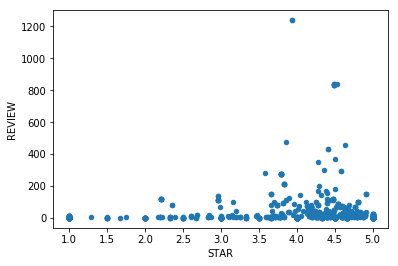

In [49]:
#df['PROMO_FLAG'].apply(lambda x: x.replace('NaN', 'No data'))
df.describe().transpose()
import matplotlib.pyplot as plt

df.plot(x = 'STAR', y='REVIEW', kind='scatter')
df['lenght'] = df['product'].apply(lambda x: len(x))
df['lenght1'] = df['product'].str.agg(len)
df.head()

In [ ]:
import re
import sys
import bs4
from bs4 import BeautifulSoup as soup
import urllib
from urllib import urlopen as uReq
import codecs
import unicodedata

html = uReq(url)
page_soup = soup(html,'html.parser')

container = page_soup.findAll()

In [242]:
df.describe()

,price_was,price_save,star,review
count,997.000000,997.000000,997.000000,997.000000
mean,84.105095,39.504905,4.082356,34.256770
std,216.839113,67.637308,1.091917,105.812938
min,2.880000,0.790000,1.000000,1.000000
25%,17.990000,4.710000,3.787000,2.000000
50%,27.300000,10.360000,4.444400,5.000000
75%,69.600000,34.450000,5.000000,22.000000
max,5699.990000,537.000000,5.000000,1238.000000


In [243]:
df.columns

Index([u'product', u'price_was', u'price_save', u'price', u'star', u'review',
       u'promo_flag'],
      dtype='object')

In [244]:
df[(df['price_was']<100) & (df['promo_flag'] == 'Best Seller') & (df['star'] > 4) & (df['review'] >= 50)]  

,product,price_was,price_save,price,star,review,promo_flag
0,Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.3869,168,Best Seller
377,Disney Minnie Mouse Happy Helpers 6V Battery P...,59.87,10.87,59.87,4.3974,156,Best Seller


In [245]:
df1 = df.groupby(['promo_flag','price'], axis =0)['price_was'].mean()

In [246]:
df1

promo_flag     price    
Best Seller    29.99         39.970
               44.99        119.950
               59.87         59.870
               6.49          12.970
               7.99          34.950
Clearance      10.71         20.990
               114.99       249.950
               119.99       199.990
               12.94         32.350
               124.99       199.990
               13.74         27.480
               149.99       209.990
               159.99       259.990
               16.53         49.590
               16.99         16.990
               19.99         40.990
               21.19         49.870
               21.53 -       21.530
               22.95 -       22.950
               239.99       449.950
               26.12         33.490
               26.69         41.375
               27.58         35.360
               27.89 -       27.890
               27.99         83.970
               29.91         89.730
               29.99         89.970
   

In [247]:
df.index

RangeIndex(start=0, stop=997, step=1)

In [248]:
df.columns

Index([u'product', u'price_was', u'price_save', u'price', u'star', u'review',
       u'promo_flag'],
      dtype='object')

In [249]:
type(df['price'])

pandas.core.series.Series

In [250]:
type(df)

pandas.core.frame.DataFrame

In [251]:
df.rename(index = int, columns ={'product':'Product', 'price_was':'Price_before'}, inplace=True)

In [257]:
def star(x):
    return round(x, 2)

In [273]:
df.head(5)

,Price_before,price_save,price,star,review,promo_flag
Product,,,,,,
Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.39,168,Best Seller
Care for Me Learning Carrier™,22.59,6.48,22.59,4.67,45,NaN
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.00,5,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.16,100,NaN
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.42,43,Clearance


In [263]:
df['star'] = df['star'].apply(lambda x:round(x,2))

In [275]:
df.head()

,Price_before,price_save,price,star,review,promo_flag
Product,,,,,,
Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.39,168,Best Seller
Care for Me Learning Carrier™,22.59,6.48,22.59,4.67,45,NaN
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.00,5,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.16,100,NaN
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.42,43,Clearance


In [277]:
df[df.price_save.isin([21.00, 45.05])]

,Price_before,price_save,price,star,review,promo_flag
Product,,,,,,
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.00,5,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.16,100,NaN
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.42,43,Clearance
My Modern Kitchen Full Deluxe Kit Battery Operated Kitchen Playset ...,35.19,21.00,35.19,1.75,4,NaN
Children Play Tent Boys Girls Prince House Indoor Outdoor Blue Fol ...,40.99,21.00,19.99,3.79,29,Clearance
Theo Klein Electronic Toy Cash Register,49.99,21.00,49.99,2.40,5,NaN
Badger Basket Doll Armoire Bunk Bed with Ladder - White/Pink - Fit ...,42.97,21.00,42.97,4.52,71,NaN


In [278]:
df['promo_flag'].fillna(value = 0, axis = 0, inplace = True)

In [279]:
df.head()

,Price_before,price_save,price,star,review,promo_flag
Product,,,,,,
Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.39,168,Best Seller
Care for Me Learning Carrier™,22.59,6.48,22.59,4.67,45,0
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.00,5,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.16,100,0
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.42,43,Clearance


In [51]:
df[df.apply(lambda row: row.astype(str).str.contains('duce').any(), axis=1)]

,level_0,index,product,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
2,2,2,BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAU...,79.99,45.05,34.94,5.0000,5,Reduced Price,60
10,10,10,DOCTOR NURSE MEDICAL KIT ASSORTED TOY BLUE PRE...,22.95,4.96,17.99,5.0000,2,Reduced Price,71
11,11,11,OUTGEEK KIDS' PLAY TOY DIY COLORFUL LIGHT CLAY...,50.98,15.00,35.98,5.0000,2,Reduced Price,71
21,21,21,FLYING BUTTERFLY TOYS CLASSIC WIND UP SWALLOW ...,10.49,3.50,6.99,5.0000,2,Reduced Price,71
22,22,22,KIDS POLICEMAN ROLE PLAY SET COSPLAY COSTUME P...,14.99,6.00,8.99,1.0000,1,Reduced Price,71
23,23,23,BEST CHOICE PRODUCTS 12V RIDE ON CAR KIDS W/ M...,349.95,175.01,174.94,4.2857,168,Reduced Price,71
27,27,27,6 PCS BUTTERFLY TOYS FOR GIRLS WIND UP SWALLOW...,10.49,3.50,6.99,5.0000,1,Reduced Price,71
29,29,29,6 PCS FLYING BUTTERFLY TOYS CLASSIC WIND UP SW...,11.64,3.88,7.76,5.0000,2,Reduced Price,71
33,33,33,FLYING BUTTERFLY TOYS CLASSIC WIND UP SWALLOW ...,10.49,3.50,6.99,5.0000,2,Reduced Price,71
34,34,34,POLICE OFFICER GIRL CHILD COSTUME,11.59,3.50,11.59 -,5.0000,1,Reduced Price,33


In [54]:
del df['level_0']

In [55]:
df

,index,product,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
0,0,PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller,34
1,1,CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN,31
2,2,BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAU...,79.99,45.05,34.94,5.0000,5,Reduced Price,60
3,3,BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6...,46.99,45.05,46.99,3.1600,100,NaN,71
4,4,CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOO...,40.99,21.00,19.99,4.4186,43,Clearance,59
5,5,MY MODERN KITCHEN FULL DELUXE KIT BATTERY OPER...,35.19,21.00,35.19,1.7500,4,NaN,71
6,6,ALEX TOYS ARTIST STUDIO DESK TO GO,13.50,3.12,10.38,3.5000,2,NaN,34
7,7,DIGITAL DANCING WARRIOR TOY ROBOT FIGURE W/ CO...,16.95,3.12,16.95,5.0000,1,NaN,71
8,8,KID MOTORZ LIL' PATROL 6-VOLT BATTERY-POWERED ...,38.98,3.12,38.98,2.9857,70,NaN,53
9,9,BCP PRETEND PLAY ELECTRONIC CASH REGISTER TOY ...,16.99,3.12,16.99,3.8919,37,Clearance,71


In [56]:
del df['index']

In [58]:
df.head()

,product,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
0,PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller,34
1,CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN,31
2,BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAU...,79.99,45.05,34.94,5.0000,5,Reduced Price,60
3,BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6...,46.99,45.05,46.99,3.1600,100,NaN,71
4,CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOO...,40.99,21.00,19.99,4.4186,43,Clearance,59


In [61]:
df[df.apply(lambda row: row.astype(str).str.contains('Clear').any(), axis=1)]

,product,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
4,CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOO...,40.99,21.00,19.99,4.4186,43,Clearance,59
9,BCP PRETEND PLAY ELECTRONIC CASH REGISTER TOY ...,16.99,3.12,16.99,3.8919,37,Clearance,71
40,KIDS 3 WHEEL MINI KICK SCOOTER,106.79,69.66,37.13,5.0000,2,Clearance,30
58,PLAY TENTS AND TUNNELS,48.53,21.84,26.69,5.0000,1,Clearance,22
63,BEST CHOICE PRODUCTS 12V RIDE ON CAR TRUCK W/ ...,449.95,209.96,239.99,4.5028,181,Clearance,60
115,GERBER BABY TODDLER BOY MICROFLEECE FOOTED BLA...,6.47,2.97,3.50,4.0000,1,Clearance,58
161,BEST CHOICE PRODUCTS KIDS RIDE ON ATV QUAD 4 W...,249.95,134.96,114.99,4.0263,76,Clearance,71
165,COSTWAY MERCEDES BENZ ML350 6V ELECTRIC KIDS R...,209.99,60.00,149.99,3.1667,6,Clearance,71
223,MINI SIZED FUN SIMULATION APPLIANCE CHILDREN'S...,84.95,50.97,33.98,3.0000,2,Clearance,71
224,FOLDING BALL PIT PLAY TENTS INDOOR AND OUTDOOR...,83.97,55.98,27.99,3.0000,2,Clearance,71


In [65]:
df[df.apply(lambda row: row.astype(str).str.contains('Clear').any(), axis=1)]

,product,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
4,CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOO...,40.99,21.00,19.99,4.4186,43,Clearance,59
9,BCP PRETEND PLAY ELECTRONIC CASH REGISTER TOY ...,16.99,3.12,16.99,3.8919,37,Clearance,71
40,KIDS 3 WHEEL MINI KICK SCOOTER,106.79,69.66,37.13,5.0000,2,Clearance,30
58,PLAY TENTS AND TUNNELS,48.53,21.84,26.69,5.0000,1,Clearance,22
63,BEST CHOICE PRODUCTS 12V RIDE ON CAR TRUCK W/ ...,449.95,209.96,239.99,4.5028,181,Clearance,60
115,GERBER BABY TODDLER BOY MICROFLEECE FOOTED BLA...,6.47,2.97,3.50,4.0000,1,Clearance,58
161,BEST CHOICE PRODUCTS KIDS RIDE ON ATV QUAD 4 W...,249.95,134.96,114.99,4.0263,76,Clearance,71
165,COSTWAY MERCEDES BENZ ML350 6V ELECTRIC KIDS R...,209.99,60.00,149.99,3.1667,6,Clearance,71
223,MINI SIZED FUN SIMULATION APPLIANCE CHILDREN'S...,84.95,50.97,33.98,3.0000,2,Clearance,71
224,FOLDING BALL PIT PLAY TENTS INDOOR AND OUTDOOR...,83.97,55.98,27.99,3.0000,2,Clearance,71


In [70]:
df.head()

,product,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
0,PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller,34
1,CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN,31
2,BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAU...,79.99,45.05,34.94,5.0000,5,Reduced Price,60
3,BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6...,46.99,45.05,46.99,3.1600,100,NaN,71
4,CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOO...,40.99,21.00,19.99,4.4186,43,Clearance,59


In [71]:
df.set_index('product')

,PRICE_WAS,PRICE_SAVE,PRICE,STAR,REVIEW,PROMO_FLAG,lenght
product,,,,,,,
PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller,34
CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN,31
BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAUTY ACCESSORIES,79.99,45.05,34.94,5.0000,5,Reduced Price,60
BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6V TOY BATTERY POWERE ...,46.99,45.05,46.99,3.1600,100,NaN,71
CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOOR/OUTDOOR USE,40.99,21.00,19.99,4.4186,43,Clearance,59
MY MODERN KITCHEN FULL DELUXE KIT BATTERY OPERATED KITCHEN PLAYSET ...,35.19,21.00,35.19,1.7500,4,NaN,71
ALEX TOYS ARTIST STUDIO DESK TO GO,13.50,3.12,10.38,3.5000,2,NaN,34
DIGITAL DANCING WARRIOR TOY ROBOT FIGURE W/ COLORFUL ROTATING LIGH ...,16.95,3.12,16.95,5.0000,1,NaN,71
KID MOTORZ LIL' PATROL 6-VOLT BATTERY-POWERED RIDE-ON,38.98,3.12,38.98,2.9857,70,NaN,53


In [82]:
df = pd.read_csv('C:\Users\Mike\walmart_toys.csv', index_col ='product')

In [83]:
df.head()

,price_was,price_save,price,star,review,promo_flag
product,,,,,,
Pressman Toy Let's Go Fishin' Game,12.97,6.48,6.49,4.3869,168,Best Seller
Care for Me Learning Carrier™,22.59,6.48,22.59,4.6667,45,NaN
Best Choice Products Toy Vanity Set w/16 Beauty Accessories,79.99,45.05,34.94,5.0000,5,Reduced Price
Best Choice Products Kids Ride On Motorcycle 6V Toy Battery Powere ...,46.99,45.05,46.99,3.1600,100,NaN
Children Play Tent Girls Pink Castle for Indoor/Outdoor Use,40.99,21.00,19.99,4.4186,43,Clearance


In [86]:
df.index = df.index.str.upper()

In [88]:
df.head()

,price_was,price_save,price,star,review,promo_flag
product,,,,,,
PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller
CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN
BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAUTY ACCESSORIES,79.99,45.05,34.94,5.0000,5,Reduced Price
BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6V TOY BATTERY POWERE ...,46.99,45.05,46.99,3.1600,100,NaN
CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOOR/OUTDOOR USE,40.99,21.00,19.99,4.4186,43,Clearance


In [89]:
df1 = df.dropna()

In [90]:
df1.head()

,price_was,price_save,price,star,review,promo_flag
product,,,,,,
PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller
BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAUTY ACCESSORIES,79.99,45.05,34.94,5.0000,5,Reduced Price
CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOOR/OUTDOOR USE,40.99,21.00,19.99,4.4186,43,Clearance
BCP PRETEND PLAY ELECTRONIC CASH REGISTER TOY REALISTIC ACTIONS & ...,16.99,3.12,16.99,3.8919,37,Clearance
DOCTOR NURSE MEDICAL KIT ASSORTED TOY BLUE PRETEND PLAY EDUCATIONA ...,22.95,4.96,17.99,5.0000,2,Reduced Price


In [102]:
del df2

In [103]:
del df3

In [104]:
df3

NameError: name 'df3' is not defined

In [107]:
del df2

In [108]:
df1.groupby('promo_flag').count()

,price_was,price_save,price,star,review
promo_flag,,,,,
Best Seller,5,5,5,5,5
Clearance,52,52,52,52,52
New,10,10,10,10,10
Only at Walmart,4,4,4,4,4
Reduced Price,140,140,140,140,140
Rollback,26,26,26,26,26
Special Buy,5,5,5,5,5


In [109]:
df.groupby('promo_flag').sum()

,price_was,price_save,star,review
promo_flag,,,,
Best Seller,267.71,129.25,20.2366,758
Clearance,3759.42,1811.12,198.7395,1178
New,662.26,406.11,44.6790,191
Only at Walmart,439.82,311.60,17.3993,277
Reduced Price,22747.96,10099.22,574.5638,4263
Rollback,4179.47,1432.03,112.1495,3427
Special Buy,402.55,129.57,20.4767,1030


In [111]:
print (type(df1['price']))

<class 'pandas.core.series.Series'>


In [119]:
df2 = df1.groupby('promo_flag')[['price_save', 'review', 'star']].mean()

In [140]:
df2 = df2.groupby(['promo_flag'], axis =0)['review'].mean()

In [141]:
df2

promo_flag
Best Seller        151.600000
Clearance           22.653846
New                 19.100000
Only at Walmart     69.250000
Reduced Price       30.450000
Rollback           131.807692
Special Buy        206.000000
Name: review, dtype: float64

In [131]:
df.reset_index()

,product,price_was,price_save,price,star,review,promo_flag
0,PRESSMAN TOY LET'S GO FISHIN' GAME,12.97,6.48,6.49,4.3869,168,Best Seller
1,CARE FOR ME LEARNING CARRIER™,22.59,6.48,22.59,4.6667,45,NaN
2,BEST CHOICE PRODUCTS TOY VANITY SET W/16 BEAU...,79.99,45.05,34.94,5.0000,5,Reduced Price
3,BEST CHOICE PRODUCTS KIDS RIDE ON MOTORCYCLE 6...,46.99,45.05,46.99,3.1600,100,NaN
4,CHILDREN PLAY TENT GIRLS PINK CASTLE FOR INDOO...,40.99,21.00,19.99,4.4186,43,Clearance
5,MY MODERN KITCHEN FULL DELUXE KIT BATTERY OPER...,35.19,21.00,35.19,1.7500,4,NaN
6,ALEX TOYS ARTIST STUDIO DESK TO GO,13.50,3.12,10.38,3.5000,2,NaN
7,DIGITAL DANCING WARRIOR TOY ROBOT FIGURE W/ CO...,16.95,3.12,16.95,5.0000,1,NaN
8,KID MOTORZ LIL' PATROL 6-VOLT BATTERY-POWERED ...,38.98,3.12,38.98,2.9857,70,NaN
9,BCP PRETEND PLAY ELECTRONIC CASH REGISTER TOY ...,16.99,3.12,16.99,3.8919,37,Clearance
